<a href="https://colab.research.google.com/github/MDaniyalTariq/Transfer-Learning-Pre-Trained-Flower-Detection-Model/blob/main/Transfer_Learnign_Pre_Trained_Flower_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import PIL.Image as Image
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tf_keras

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
                   input_shape=IMAGE_SHAPE + (3,),
                   trainable=False)  # Set trainable=False if you don't want to fine-tune
])


In [4]:
from google.colab import files
uploaded = files.upload()

In [5]:
import os
os.listdir()

['.config',
 'gold_fish.jpeg',
 'ImageNetLabels.txt',
 'datasets',
 'ImageNetLabels.txt.1',
 'IMG-20210801-WA0009.jpg',
 'sample_data']

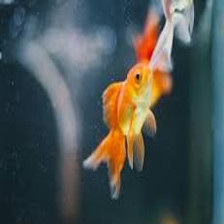

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

gold_fish = Image.open("gold_fish.jpeg")
IMAGE_SHAPE = (224, 224)
gold_fish = gold_fish.resize(IMAGE_SHAPE)
gold_fish

In [7]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish[np.newaxis, ...]

array([[[[0.3372549 , 0.44313725, 0.50980392],
         [0.29803922, 0.40392157, 0.47058824],
         [0.26666667, 0.36862745, 0.43529412],
         ...,
         [0.32156863, 0.5254902 , 0.57647059],
         [0.34117647, 0.53333333, 0.58823529],
         [0.35294118, 0.53333333, 0.59607843]],

        [[0.30980392, 0.41568627, 0.48235294],
         [0.27843137, 0.38431373, 0.45098039],
         [0.25882353, 0.36078431, 0.43137255],
         ...,
         [0.32156863, 0.52156863, 0.57647059],
         [0.34117647, 0.53333333, 0.58823529],
         [0.35294118, 0.53333333, 0.59607843]],

        [[0.25490196, 0.35686275, 0.42352941],
         [0.23921569, 0.34117647, 0.40784314],
         [0.23529412, 0.3372549 , 0.4       ],
         ...,
         [0.3254902 , 0.51764706, 0.57254902],
         [0.34509804, 0.53333333, 0.58823529],
         [0.35294118, 0.53333333, 0.59607843]],

        ...,

        [[0.0745098 , 0.11764706, 0.14117647],
         [0.0745098 , 0.11764706, 0.14117647]

In [9]:
result=classifier(gold_fish[np.newaxis, ...])
result.shape

TensorShape([1, 1001])

In [10]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

In [11]:
image_labels=[]
with open("ImageNetLabels.txt", "r") as f:
  image_labels=f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [12]:
image_labels[predicted_label_index]

'goldfish'

In [13]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,cache_dir='.', untar=True)

In [14]:
data_dir

'./datasets/flower_photos'

In [15]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [16]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/18204150090_fb418bbddb.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7884440256_91c033732d.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3954167682_128398bf79_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/17466568484_9128287148.jpg'),
 PosixPath('datasets/flower_photos/dandelion/9029297232_de50698e2f_n.jpg')]

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [18]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/12238827553_cf427bfd51_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('datasets/flower_photos/roses/5156037859_1673720a11_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6158504080_b844a9ae05.jpg')]

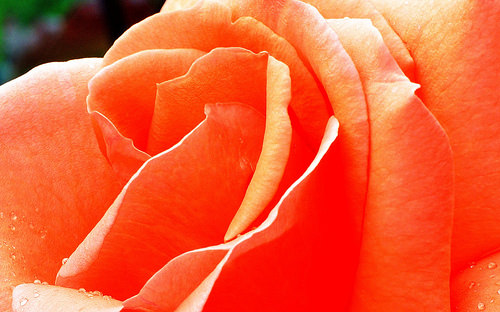

In [19]:
Image.open(str(roses[1]))

In [20]:
tulips=list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/2399982682_16929d1f6d_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13514131694_d91da4f4fc.jpg'),
 PosixPath('datasets/flower_photos/tulips/17844723633_da85357fe3.jpg'),
 PosixPath('datasets/flower_photos/tulips/6948239566_0ac0a124ee_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14067761295_7cfe6a42e9.jpg')]

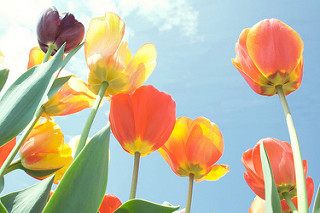

In [21]:
Image.open(str(tulips[0]))

In [22]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}


In [23]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [24]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/12238827553_cf427bfd51_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('datasets/flower_photos/roses/5156037859_1673720a11_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6158504080_b844a9ae05.jpg')]

In [25]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/12238827553_cf427bfd51_n.jpg'

In [26]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [27]:
img.shape

(254, 320, 3)

In [28]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [29]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(224,224))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [30]:
X=np.array(X)
y=np.array(y)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [32]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [33]:
X[0].shape

(224, 224, 3)

In [34]:
x0_resized=tf.image.resize(X[0],IMAGE_SHAPE)
xl_resized=tf.image.resize(X[1],IMAGE_SHAPE)
x2_resized=tf.image.resize(X[2],IMAGE_SHAPE)

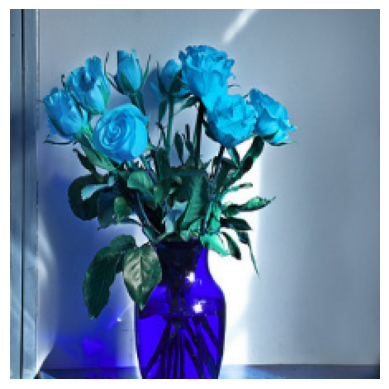

In [35]:
plt.axis('off')
plt.imshow(X[0])

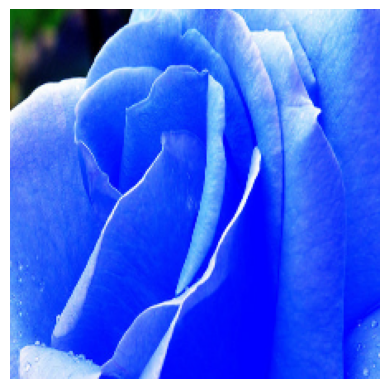

In [36]:
plt.axis('off')
plt.imshow(X[1])

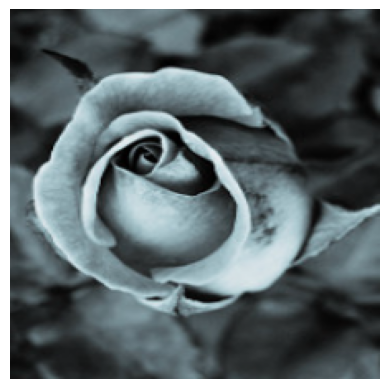

In [37]:
plt.axis('off')
plt.imshow(X[2])

In [38]:
input_batch = np.array([x0_resized, xl_resized, x2_resized])

predicted = classifier.predict(input_batch)
predicted=np.argmax(predicted,axis=1)
print(predicted)

1/1 [==============================] - 15s 15s/step
[722 795 722]


In [39]:
image_labels[795]

'shower curtain'

Now taking Pre Trained model and retrain it using flowers images

In [40]:
feature_extractor_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer=hub.KerasLayer(feature_extractor_model,input_shape=(224,224),trainable=False)

In [41]:
num_of_flowers=5
model=tf_keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])
model.build(input_shape=(None, 224, 224, 3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_1 (ModuleWr  (None, 1280)              2257984   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 5)                 6405      
 apper)                                                          
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
model.fit(X_train_scaled,y_train,epochs=5)